### Apartment Price Prediction: A Data-Driven Approach

This project delves into the world of apartment price prediction, aiming to empower various participants in the housing market:

* **Real Estate Agents & Investors:** Leverage the power of data by comparing prices based on key parameters like location and apartment size. This data-driven approach equips you to make informed decisions. 
* **Renters:** Navigate the rental market with confidence. Understand price variations and market trends to find the perfect apartment at a fair price.

To achieve these goals, we employed a comparative analysis of three regression models. We evaluated their performance using error metrics and identified the features that hold the most significance for accurate price prediction.


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housepricw/Bengaluru_House_Data.csv
/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv
/kaggle/input/house-price/Bengaluru_House_Data.csv


In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

#### ing  data and columns



In [6]:
df1 = pd.read_csv("/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df1.shape



(13320, 9)

Column Descriptions:
¶

**area_type**: Specifies the type of area for the property (such as built-up area, plot area)

**availability**: Indicates the availability status of the property (like specific date availability or ready to move)

**location**: Specifies the location of the property

**size**: Indicates the size of the property unit (like the number of rooms and facilities)

**society**: Refers to the name of the residential society or building

**total_sqft**: Specifies the total square footage of the property

**bath**: Indicates the number of bathrooms in the property

**balcony**: Specifies the number of balconies in the property

**price**: Specifies the price of the property


In [8]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

### creating  availability_Code column from availability column      

### the strings 'ready to move' become 0 
### all  other strings          become 1 



In [9]:
mapping = {'ready to move': 0, 'other': 1}
df_availability=df1.copy()
df_availability['availability_Code'] = df_availability['availability'].apply(lambda x: mapping.get(x.lower(), 1))
df_availability.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,availability_Code
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,1
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0


### the society column not relevant and will be deleted



In [10]:
df_drop_society = df_availability.copy()
df_drop_society = df_drop_society.drop(['society'],axis='columns')
df_drop_society.shape

(13320, 9)

###  Cleaning: dropping missing  NA  


In [11]:
df_drop_society.isnull().sum()

area_type              0
availability           0
location               1
size                  16
total_sqft             0
bath                  73
balcony              609
price                  0
availability_Code      0
dtype: int64

In [12]:
df_nonull =df_drop_society.dropna()
df_nonull.isnull().sum()

area_type            0
availability         0
location             0
size                 0
total_sqft           0
bath                 0
balcony              0
price                0
availability_Code    0
dtype: int64

In [13]:
df_nonull.shape

(12710, 9)

### dropping duplicated

In [14]:
df_nonull.drop_duplicates(inplace=True)
df_no_dup=df_nonull
df_no_dup.shape


/tmp/ipykernel_34/1649301767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonull.drop_duplicates(inplace=True)


(12146, 9)

### creating new column BK which is number of bedroom&kitchen  
### based on the column size 
  




In [15]:
df_bk=df_no_dup.copy()
df_bk['bk'] = df_no_dup['size'].apply(lambda x: int(x.split(' ')[0]))
df_bk.bk.unique()


array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

### transforming column total_sqft values to float 

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df_sqrft=df_bk.copy()
#Testing in cases where conversion to float was not successful

df_sqrft[~df_sqrft['total_sqft'].apply(is_float)]

,area_type,availability,location,size,total_sqft,bath,balcony,price,availability_Code,bk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,1,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,1,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,1,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,1,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,0,2
...,...,...,...,...,...,...,...,...,...,...
12955,Super built-up Area,18-Nov,Thanisandra,3 BHK,1437 - 1629,3.0,0.0,75.885,1,3
12975,Super built-up Area,20-Aug,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,1,2
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,1,3
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,0,2


### transforming column total_sqft  to float and avg

In [19]:
def sqft_to_float(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [20]:
#Activating average  and float conversion 
df_sqrft['total_sqft'] = df_sqrft.total_sqft.apply(sqft_to_float)
df_sqrft = df_sqrft[df_sqrft.total_sqft.notnull()]
df_sqrft.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,availability_Code,bk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,0,2


 
###  Rupee  to dollars ratio

In [21]:
rupee_to_dollar=100000/73

### Adding  feature price_per_sqft and converting from rupee  to dollars

In [23]:
df_to_dollars=df_sqrft.copy()
#Convert price from rupees to dollars
df_to_dollars['price'] = df_to_dollars['price']*rupee_to_dollar
#price per sqft in dollars
df_to_dollars['price_per_sqft'] = df_to_dollars['price']/df_to_dollars['total_sqft']
df_to_dollars.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,availability_Code,bk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,53520.547945,1,2,50.682337
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,164383.561644,0,4,63.224447
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,84931.506849,0,3,58.980213
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,130136.986301,0,3,85.560149
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,69863.013699,0,2,58.219178


In [24]:
#Counting the amounts of the location
location_stats = df_to_dollars['location'].value_counts(ascending=False)
location_stats

location
Whitefield           496
Sarjapur  Road       352
Electronic City      284
Kanakpura Road       229
Thanisandra          225
                    ... 
S R Layout             1
Meenakshi Layout       1
Vidyapeeta             1
Maruthi Extension      1
Abshot Layout          1
Name: count, Length: 1259, dtype: int64

### Dimensionality Reduction
### up to 100 instance of location will groubed as "other" 
### decreasing data - for one hot encoding

In [25]:
up_to_100 = location_stats[location_stats<100]
up_to_100 

location
Rajaji Nagar                99
Haralur Road                92
Bellandur                   88
Electronics City Phase 1    86
Hoodi                       86
                            ..
S R Layout                   1
Meenakshi Layout             1
Vidyapeeta                   1
Maruthi Extension            1
Abshot Layout                1
Name: count, Length: 1245, dtype: int64

In [26]:
df_to_dollars.location = df_to_dollars.location.apply(lambda x: 'other' if x in up_to_100  else x)
len(df_to_dollars.location.unique())

15

In [27]:
df_to_dollars.shape


(12104, 11)


 ### minimum ratio of - sqrft to  1 bedroom&kitchen - is 300 
 ### less than that will be removed 

In [28]:
df_sqrft_to_bk_raio=df_to_dollars.copy()
df_sqrft_to_bk_raio[df_sqrft_to_bk_raio.total_sqft/df_sqrft_to_bk_raio.bk<300].head()


,area_type,availability,location,size,total_sqft,bath,balcony,price,availability_Code,bk,price_per_sqft
58,Plot Area,Ready To Move,other,6 Bedroom,1407.0,4.0,1.0,205479.452055,0,6,146.040833
68,Plot Area,Ready To Move,other,8 Bedroom,1350.0,7.0,0.0,116438.356164,0,8,86.250634
70,Plot Area,Ready To Move,other,3 Bedroom,500.0,3.0,2.0,136986.301370,0,3,273.972603
78,Built-up Area,Ready To Move,other,2 BHK,460.0,1.0,0.0,30136.986301,0,2,65.515188
89,Plot Area,Ready To Move,other,6 Bedroom,710.0,6.0,3.0,219178.082192,0,6,308.701524


In [29]:
df_sqrft_to_bk_raio = df_sqrft_to_bk_raio[~(df_sqrft_to_bk_raio.total_sqft/df_sqrft_to_bk_raio.bk<300)]
df_to_dollars.shape

(12104, 11)

 ### Outlier column - price_per_sqft - too low or too high
 ### need to remove outliers under consideration with location
 ### using mean and standard deviation
 



In [30]:
df_sqrft_to_bk_raio.price_per_sqft.describe()


count    11459.000000
mean        85.880636
std         55.529848
min          3.668902
25%         57.939254
50%         72.522160
75%         94.219326
max       2417.405318
Name: price_per_sqft, dtype: float64

### min  is 3.66 dollar/sqft
### max is 2412, wide variation 
###  remove outliers per location 

In [31]:
def pps_outliers(df):
    df_out = pd.DataFrame()
    #for each location gets prices 1 std around the mean
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st_times2 = np.std(subdf.price_per_sqft)
        df_normal = subdf[(subdf.price_per_sqft>(m-st_times2)) & (subdf.price_per_sqft<(m+st_times2))]
        df_out = pd.concat([df_out,df_normal],ignore_index=True)
    return df_out
df_normolise_price = pps_outliers(df_sqrft_to_bk_raio)
df_normolise_price.price_per_sqft.describe() 



count    10159.000000
mean        74.182353
std         23.281083
min         28.276989
25%         57.445868
50%         70.315715
75%         87.180018
max        149.693627
Name: price_per_sqft, dtype: float64

### How much information remains in percentage relative to the last operation


In [32]:
how_many_rows=len(df_normolise_price)/len(df_sqrft_to_bk_raio) *100
how_many_rows

88.65520551531547

#### plot function  price vs sqrft  given location and 2 values of badroom&kitchen 


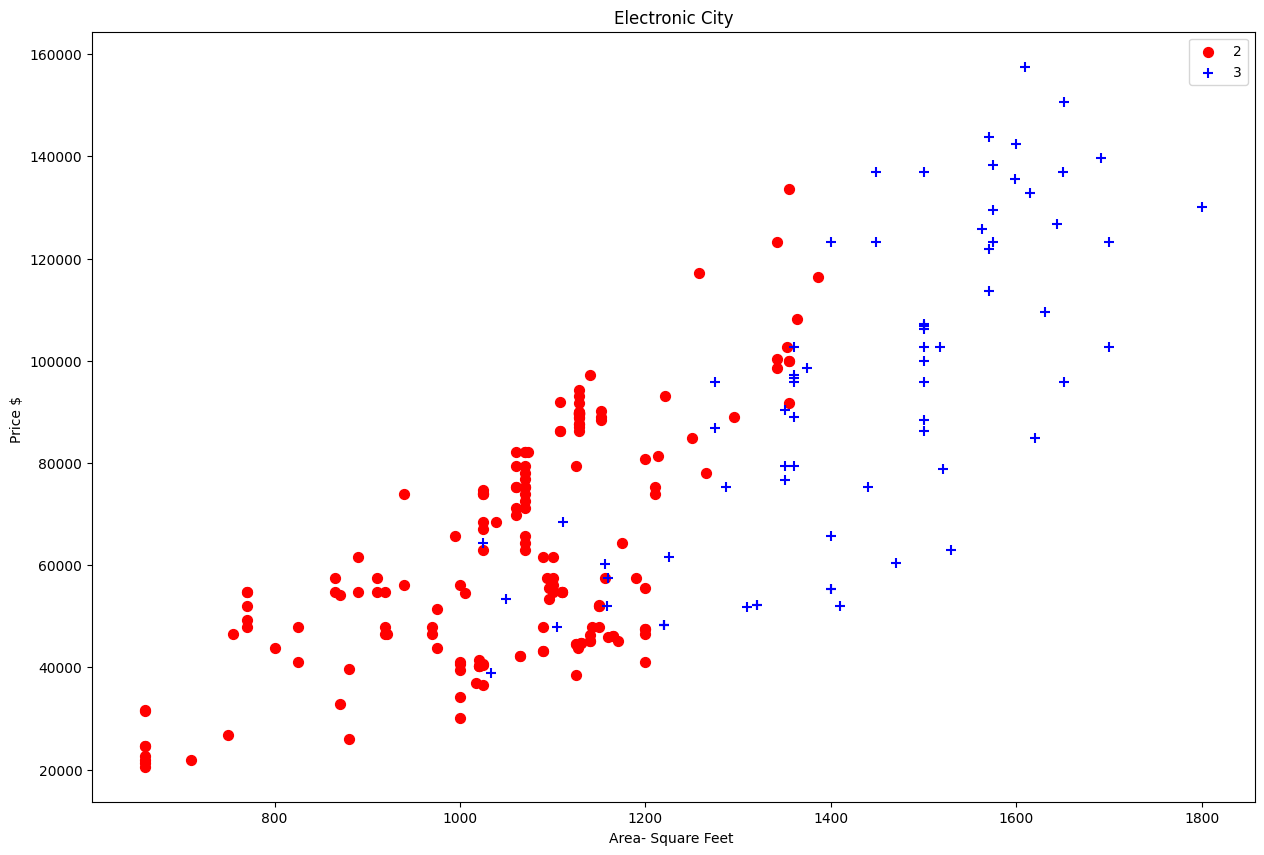

In [33]:
def plot_price_sqrft(df,location='Electronic City',num_bk1=1,num_bk2=2):
    bk2 = df[(df.location==location) & (df.bk==num_bk1)]
    bk3 = df[(df.location==location) & (df.bk==num_bk2)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bk2.total_sqft,bk2.price,color='red',label= num_bk1, s=50)
    plt.scatter(bk3.total_sqft,bk3.price,marker='+', color='blue',label= num_bk2, s=50)
    plt.xlabel("Area- Square Feet ")
    plt.ylabel("Price $ ")
    plt.title(location)
    plt.legend()
    
plot_price_sqrft(df_normolise_price,'Electronic City',2,3)

 ### one hot for locations

In [44]:
df_oh = pd.get_dummies(
    data=df_normolise_price,
    columns=["area_type", "location"],
    prefix=["darea", "dloc"])

In [45]:
df_oh.head()


,availability,size,total_sqft,bath,balcony,price,availability_Code,bk,price_per_sqft,darea_Built-up Area,...,dloc_Hennur Road,dloc_Kanakpura Road,dloc_Marathahalli,dloc_Raja Rajeshwari Nagar,dloc_Sarjapur Road,dloc_Thanisandra,dloc_Uttarahalli,dloc_Whitefield,dloc_Yelahanka,dloc_other
0,Ready To Move,2 BHK,1080.0,2.0,2.0,98630.136986,0,2,91.324201,True,...,False,False,False,False,False,False,False,False,False,False
1,Ready To Move,2 BHK,1270.0,2.0,2.0,127397.260274,0,2,100.312803,False,...,False,False,False,False,False,False,False,False,False,False
2,Ready To Move,3 BHK,1420.0,2.0,1.0,136986.301370,0,3,96.469226,True,...,False,False,False,False,False,False,False,False,False,False
3,Ready To Move,3 BHK,1850.0,3.0,1.0,205479.452055,0,3,111.069974,True,...,False,False,False,False,False,False,False,False,False,False
4,Ready To Move,2 BHK,1245.0,2.0,1.0,128767.123288,0,2,103.427408,True,...,False,False,False,False,False,False,False,False,False,False


### prediction prices

In [36]:
X= df_oh.drop(['price','availability','size','price_per_sqft'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,availability_Code,bk,darea_Built-up Area,darea_Carpet Area,darea_Plot Area,darea_Super built-up Area,dloc_7th Phase JP Nagar,...,dloc_Hennur Road,dloc_Kanakpura Road,dloc_Marathahalli,dloc_Raja Rajeshwari Nagar,dloc_Sarjapur Road,dloc_Thanisandra,dloc_Uttarahalli,dloc_Whitefield,dloc_Yelahanka,dloc_other
0,1080.0,2.0,2.0,0,2,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1270.0,2.0,2.0,0,2,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,1420.0,2.0,1.0,0,3,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [37]:
X.shape


(10159, 24)

In [38]:
y = df_oh.price
y.shape

(10159,)

### the AVG of the prices

In [41]:
y.mean()

113468.58713577408

### creating and comparing 3 regression models 

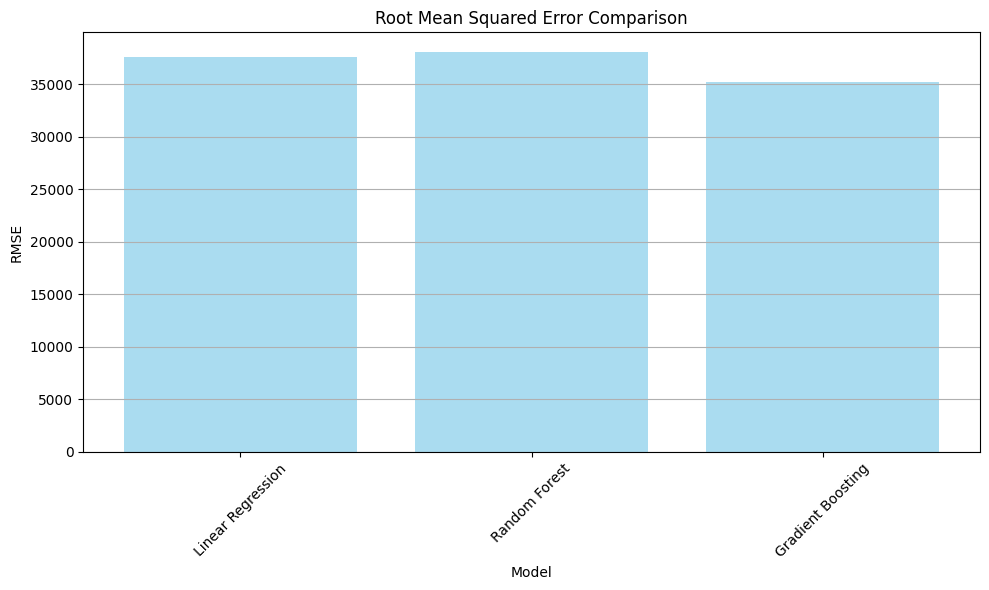

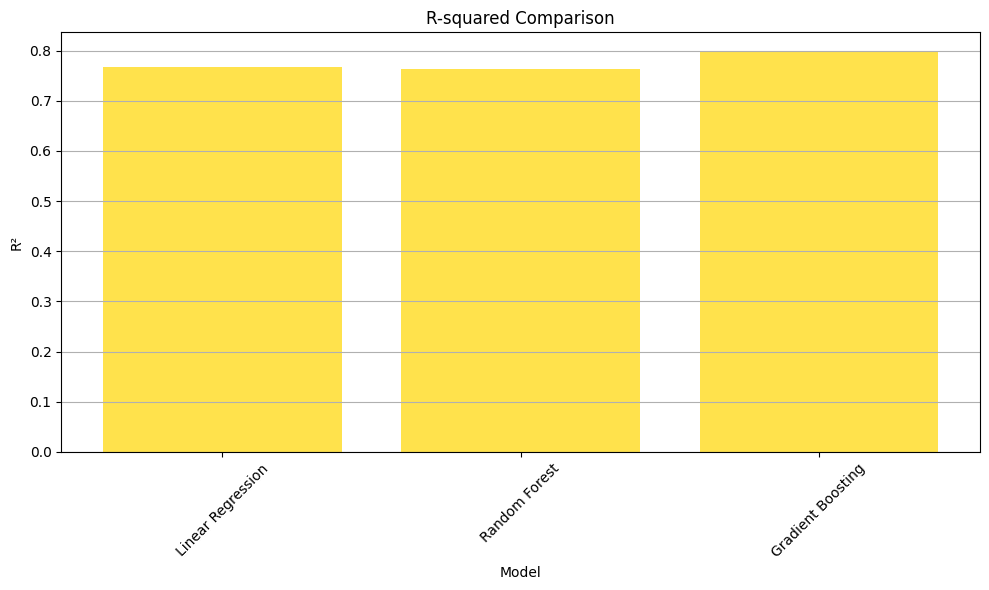


Linear Regression Results:
RMSE: 37644.22
R²: 0.7677
Important Features: Index(['total_sqft', 'bath', 'balcony', 'availability_Code', 'bk',
       'darea_Built-up  Area', 'darea_Carpet  Area', 'darea_Plot  Area',
       'darea_Super built-up  Area', 'dloc_7th Phase JP Nagar',
       'dloc_Bannerghatta Road', 'dloc_Electronic City',
       'dloc_Electronic City Phase II', 'dloc_Hebbal', 'dloc_Hennur Road',
       'dloc_Kanakpura Road', 'dloc_Marathahalli',
       'dloc_Raja Rajeshwari Nagar', 'dloc_Sarjapur  Road', 'dloc_Thanisandra',
       'dloc_Uttarahalli', 'dloc_Whitefield', 'dloc_Yelahanka', 'dloc_other'],
      dtype='object')

Random Forest Results:
RMSE: 38056.12
R²: 0.7626
Top Features: Index(['total_sqft', 'bk', 'bath', 'balcony', 'availability_Code',
       'darea_Built-up  Area', 'darea_Plot  Area',
       'darea_Super built-up  Area', 'dloc_other', 'dloc_Hebbal'],
      dtype='object')

Gradient Boosting Results:
RMSE: 35224.30
R²: 0.7966
Top Features: Index(['total_sqft'

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Prepare results dictionary for plotting
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)

    # Make predictions on test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Feature importance (applicable to Random Forest and Gradient Boosting)
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        sorted_indices = np.argsort(importances)[::-1]
        top_features = X.columns[sorted_indices[:10]]  # Show top 10 most important features
        results[name] = {"rmse": rmse, "r2": r2, "top_features": top_features}

    else:  # Linear Regression
        linear_model = model
        selector = SelectFromModel(linear_model, threshold=0.1)  # Adjust threshold as needed
        selector.fit(X_train, y_train)
        support = selector.get_support()
        important_features = X.columns[support]
        results[name] = {"rmse": rmse, "r2": r2, "important_features": important_features}

# Prepare data for plotting MSE and R²
model_names = list(results.keys())
rmse_values = [result["rmse"] for result in results.values()]
r2_values = [result["r2"] for result in results.values()]

# Create the MSE plot
plt.figure(figsize=(10, 6))
plt.bar(model_names,rmse_values, color='skyblue', alpha=0.7, label='Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()  # Display MSE plot

# Create the R² plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values, color='gold', alpha=0.7, label='R-squared')
plt.xlabel('Model')
plt.ylabel('R²')
plt.title('R-squared Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()  # Display R² plot

# Print detailed results for each model (optional)
for name, result in results.items():
    print(f"\n{name} Results:")
    print(f"RMSE: {result['rmse']:.2f}")
    print(f"R²: {result['r2']:.4f}")
    if "top_features" in result:
        print(f"Top Features: {result['top_features']}")
    else:
        print(f"Important Features: {result['important_features']}")
        


In [40]:
for name, model in models.items():
    model.fit(X_train, y_train)

    # Make predictions on test set
    y_pred = model.predict(X_test)

    # Print a sample of true vs. predicted prices (optional)
    sample_size = 5  # Adjust sample size as needed
    print(f"\n{name} - Sample True vs. Predicted Prices:")
    for i in range(sample_size):
        print(f"  - True Price: {y_test.iloc[i]:.2f}, Predicted Price: {y_pred[i]:.2f}")
    



Linear Regression - Sample True vs. Predicted Prices:
  - True Price: 68493.15, Predicted Price: 60215.95
  - True Price: 35616.44, Predicted Price: 34894.46
  - True Price: 87780.82, Predicted Price: 86852.21
  - True Price: 75342.47, Predicted Price: 81309.58
  - True Price: 61643.84, Predicted Price: 78571.91

Random Forest - Sample True vs. Predicted Prices:
  - True Price: 68493.15, Predicted Price: 69356.16
  - True Price: 35616.44, Predicted Price: 48934.36
  - True Price: 87780.82, Predicted Price: 63153.07
  - True Price: 75342.47, Predicted Price: 74218.27
  - True Price: 61643.84, Predicted Price: 61861.54

Gradient Boosting - Sample True vs. Predicted Prices:
  - True Price: 68493.15, Predicted Price: 68119.67
  - True Price: 35616.44, Predicted Price: 45495.56
  - True Price: 87780.82, Predicted Price: 73600.78
  - True Price: 75342.47, Predicted Price: 72351.90
  - True Price: 61643.84, Predicted Price: 68790.60


#### Conclusions:

1-The three models show close results.

Linear Regression Results:
RMSE: 37644.22
R²: 0.7677

Random Forest Results:
RMSE: 38056.12
R²: 0.7626

Gradient Boosting Results:
RMSE: 35224.30
R²: 0.7966

since  linear model shows only linear relationships And all models show similar results it can be concluded that the effect of the parameters is most part linear

2-The best model with the smallest RMSE and higher R2
is Gradient Boosting Results
that because gradient boosting are more sophisticated handling complex patterns 


3-All the models present the total area as the most important predictor other predictors are the number of rooms,number of bath and balcony 

4-Proportion of Error: Since the average house price is 113468.5871, and the rmse is 35224.30  the error is (35224.30 / 113468.5871 * 100)
31 % .  an avrage  predictions deviate from the actual house prices by $35224.30. 

5- To improve the predictions, other models should be tested.
In addition to the availability column, we ignored the effect of different dates on the price. 
In addition, the larger the data, the greater the predictability, so it is also possible that additional features are missing, such as distance from means of transportation, distance from the bus station, etc.

